# Scikit-HEP tools
* [Scikit-HEP project](https://scikit-hep.org) provides high-performance data analysis tools in Python
* Partially funded by NSF grants, community of ~100 people
* Core values
    * Non-monolithic approach: collection of specialized tools that connect well
    * Pythonic design
    * Easy installation
    * Good documentation
    * Reactive to community feedback
* Core packages
    * [uproot](https://github.com/scikit-hep/uproot): fast reading and writing of ROOT Trees
    * [boost-histogram](https://github.com/scikit-hep/boost-histogram): fast and flexible multi-dimensional histograms and profiles
    * [particle](https://github.com/scikit-hep/particle): get particle properties from PDG IDs
    * [iminuit](https://github.com/scikit-hep/iminuit): Python wrapper to MINUIT minimization and error computation package

**The power of combinatorics**

* High-level tools convenient to solve restricted set of problems foreseen by authors
* Fast results, but what to do when it does not work?

<img src="https://images.unsplash.com/photo-1571890757032-35469e44c4e5?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1834&q=80" width=40%/>

* Low-level tools allow you to build everything from basic components

<img src="https://images.unsplash.com/photo-1578211952774-21325799c14d?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80" width=40%/>
    
<img src="https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/source/logo-300px.png" width=20%/>

* uproot provides very fast, efficient, and convenient access to ROOT trees

[<img src="https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/logscales.png" width="70%"/>](https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/logscales.png)

<img src="https://raw.githubusercontent.com/scikit-hep/boost-histogram/develop/docs/_images/BoostHistogramPythonLogo.png" width=25%/>

* Python frontend to Boost.Histogram library in C++ from the Boost project
* No external dependency
* Very fast and feature-rich
* Beta-state, but super reliable implementation from production-ready C++ code from Boost
* Multi-dimensional histograms and profiles
* Supports weighted and unweighted data
* And much much more, see docs

## iminuit (...really needs a nice logo, too)

* Python frontend to MINUIT2 C++ library maintained at CERN
* Basically the only fitting tool used in HEP
* No external dependency apart from numpy

In [1]:
# !pip install uproot
import uproot
f = uproot.open("example.root")
event = f["event"]
help(event)

Help on TTree in module uproot.rootio object:

class TTree(uproot.tree.TTreeMethods, TNamed, TAttLine, TAttFill, TAttMarker)
 |  Adds array reading methods to TTree objects that have been streamed from a ROOT file.
 |  
 |  - square brackets (``__getitem__``) returns a branch by name (see :py:meth:`get <uproot.tree.TTreeMethods.get>`).
 |  - the ``len`` function (``__len__``) returns the number of entries (same as ``numentries``).
 |  - iteration (``__iter__``) has no implementation. This is to avoid confusion between iterating over all branches (probably not what you want, but fitting the pattern set by :py:class:`ROOTDirectory <uproot.rootio.ROOTDirectory>` and ``dict``) and iterating over the data.
 |  
 |  **Attributes, properties, and methods:**
 |  
 |  - **name** (*bytes*) name of the TTree.
 |  - **title** (*bytes*) title of the TTree.
 |  - **numentries** (*int*) number of entries in the TTree (same as ``len``).
 |  - **pandas** connector to `Pandas <http://pandas.pydata.org/>

In [2]:
event.show()

trk_len                    (no streamer)              asdtype('>i4')
mc_trk_len                 (no streamer)              asdtype('>i4')
trk_imc                    (no streamer)              asjagged(asdtype('>i4'))
trk_px                     (no streamer)              asjagged(asdtype('>f4'))
trk_py                     (no streamer)              asjagged(asdtype('>f4'))
trk_pz                     (no streamer)              asjagged(asdtype('>f4'))
mc_trk_px                  (no streamer)              asjagged(asdtype('>f4'))
mc_trk_py                  (no streamer)              asjagged(asdtype('>f4'))
mc_trk_pz                  (no streamer)              asjagged(asdtype('>f4'))
mc_trk_pid                 (no streamer)              asjagged(asdtype('>i4'))


* mc_trk_len: number of true tracks in event
* mc_trk_px: x-component of true momentum of particle (variable-length array)
* mc_trk_py: y-component of true momentum of particle (variable-length array)
* mc_trk_pz: z-component of true momentum of particle (variable-length array)
* trk_len: number reconstructed tracks in event
* trk_px: x-component of momentum of reconstructed track (variable-length array)
* trk_py: y-component of momentum of reconstructed track (variable-length array)
* trk_pz: z-component of momentum of reconstructed track (variable-length array)
* trk_imc: index of matched true particle or -1 (variable-length array)

In [3]:
b = event["trk_len"]
help(b)

Help on TBranch in module uproot.rootio object:

class TBranch(uproot.tree.TBranchMethods, TNamed, TAttFill)
 |  Adds array reading methods to TBranch objects that have been streamed from a ROOT file.
 |  
 |  - square brackets (``__getitem__``) returns a subbranch by name (see :py:meth:`get <uproot.tree.TBranchMethods.get>`).
 |  - the ``len`` function (``__len__``) returns the number of entries (same as ``numentries``).
 |  - iteration (``__iter__``) has no implementation. This is to avoid confusion between iterating over all subbranches (probably not what you want, but fitting the pattern set by :py:class:`ROOTDirectory <uproot.rootio.ROOTDirectory>` and ``dict``) and iterating over the data.
 |  
 |  **Attributes, properties, and methods:**
 |  
 |  - **name** (*bytes*) name of the TBranch.
 |  - **title** (*bytes*) title of the TBranch.
 |  - **compression** (:py:class:`Compression <uproot.source.compressed.Compression>`) the compression algorithm and level specified in the TBranc

In [4]:
# branches in trees are usually compressed
b.compressedbytes(), b.uncompressedbytes()

(860, 4000)

In [5]:
# get the content of branches as arrays, but don't use this in large trees
# - you will exhaust the computer memory
trk_len, mc_trk_len = event.arrays(["trk_len", "mc_trk_len"]).values()
trk_px, trk_py, trk_pz = event.arrays(["trk_p[xyz]*"]).values()

In [6]:
# first ten entries, this is a normal numpy array
trk_len[:10]

array([6, 7, 2, 6, 7, 7, 6, 7, 4, 6], dtype=int32)

In [7]:
import numpy as np

print(f"{np.sum(trk_len == 0)} events with zero tracks")

5 events with zero tracks


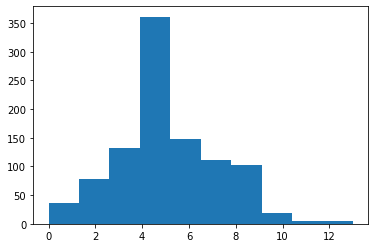

In [8]:
import matplotlib.pyplot as plt

plt.hist(trk_len);

In [9]:
# first ten entries, trk_px is a special jagged array
trk_px[:10]

<JaggedArray [[-0.9793163 0.23229323 -0.46441993 0.6294318 0.028667817 0.15552366] [-0.58950984 0.102081515 -0.2822813 ... 0.052484307 -0.24879831 -0.08361632] [0.1240152 0.3094504] ... [0.2356103 0.53839844 -0.20851801 ... -0.31117415 0.28227365 -1.0027351] [0.20467742 -0.15172224 0.08388895 -0.46563983] [0.043378998 -0.7553266 0.53192043 0.8877921 0.35176468 0.7203854]] at 0x00011545de90>

In [10]:
trk_px.content[:20], trk_px.starts[:10], trk_px.stops[:10]

(array([-0.9793163 ,  0.23229323, -0.46441993,  0.6294318 ,  0.02866782,
         0.15552366, -0.58950984,  0.10208151, -0.2822813 , -0.585217  ,
         0.05248431, -0.24879831, -0.08361632,  0.1240152 ,  0.3094504 ,
        -0.28746566,  0.00819736, -0.6708548 , -0.93345755, -0.01097227],
       dtype=float32),
 array([ 0,  6, 13, 15, 21, 28, 35, 41, 48, 52]),
 array([ 6, 13, 15, 21, 28, 35, 41, 48, 52, 58]))

In [11]:
help(trk_px)

Help on JaggedArray in module awkward.array.jagged object:

class JaggedArray(awkward.array.base.AwkwardArrayWithContent)
 |  JaggedArray(starts, stops, content)
 |  
 |  JaggedArray
 |  
 |  Method resolution order:
 |      JaggedArray
 |      awkward.array.base.AwkwardArrayWithContent
 |      awkward.array.base.AwkwardArray
 |      numpy.lib.mixins.NDArrayOperatorsMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __array_ufunc__(self, ufunc, method, *inputs, **kwargs)
 |  
 |  __awkward_serialize__(self, serializer)
 |  
 |  __getitem__(self, where)
 |  
 |  __init__(self, starts, stops, content)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, checkiter=True)
 |  
 |  __len__(self)
 |  
 |  __setitem__(self, where, what)
 |  
 |  argchoose(self, n)
 |      Return all unique combinations (up to permutation) of n elements,
 |      taken without replacement from the indices of the jagged dimension.
 |      Combinations a

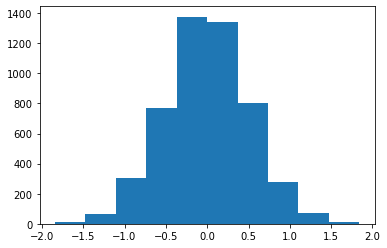

In [12]:
plt.hist(trk_px.content);

**Reading data from a large tree**

* tree often too large to load into memory all at once (tree size > 100 GB and more possible)
* two solutions
    * lazyarrays
        * pro: simple, many array operations work, minimal typing
        * con: some simple array operations do work
    * iterate over chunks (**recommended**)
        * pro: full compatibility with other tools
        * con: more typing needed to set up

In [13]:
trk_len = b.lazyarray()
print(trk_len > 10)    # ok
print(trk_len + 1)     # ok
print(np.exp(trk_len)) # ok
try:
    print(np.sum(trk_len)) # does not work
except:
    # catch the expection, but then print it for demonstration purposes
    import traceback as tb
    tb.print_exc()

[False False False False False False False ...]
[7 8 3 7 8 8 7 ...]
[403.4287934927351 1096.6331584284585 7.38905609893065 403.4287934927351 1096.6331584284585 1096.6331584284585 403.4287934927351 ...]


Traceback (most recent call last):
  File "<ipython-input-13-df2f52186f2c>", line 6, in <module>
    print(np.sum(trk_len)) # does not work
  File "<__array_function__ internals>", line 6, in sum
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 2229, in sum
    initial=initial, where=where)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 88, in _wrapreduction
    return reduction(axis=axis, out=out, **passkwargs)
TypeError: sum() got an unexpected keyword argument 'axis'


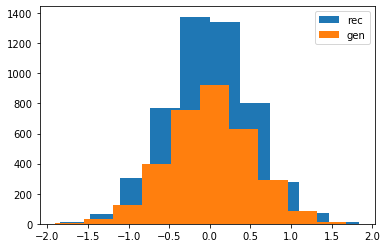

In [14]:
# use iterate but load only one chunk to see what we got
for data in event.iterate(["trk_px", "trk_imc", "mc_trk_px"]):
    trk_px, trk_imc, mc_trk_px=data.values()
    
    plt.hist(trk_px.content, label="rec")
    plt.hist(mc_trk_px.content, label="gen")
    plt.legend();
    
    break

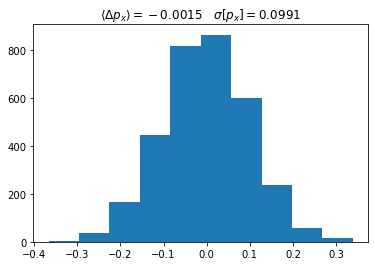

In [15]:
# let's subtract the reconstructed from the true momentum now

delta_px = []
for data in event.iterate(["trk_px", "trk_imc", "mc_trk_px"]):
    trk_px, trk_imc, mc_trk_px = data.values()
    
    for px, imc, mc_px in zip(trk_px, trk_imc, mc_trk_px):
        # select only tracks with associated true particle
        mask = imc >= 0
        px = px[mask]
        mc_px = mc_px[imc[mask]]
        delta_px = np.append(delta_px, px - mc_px)

plt.hist(delta_px)
plt.title(f"$\\langle\\Delta p_x\\rangle = {np.mean(delta_px):.4f} \quad \sigma[p_x] = {np.std(delta_px):.4f}$");

* workflow not optimal for fast computation
* again created an array `delta_px` which could be very large
* boost-histogram solves this: create histogram object once, fill iteratively

In [16]:
# let's do it again with boost-histogram
# !pip install boost-histogram
import boost_histogram as bh

xaxis = bh.axis.Regular(50, -2, 2)
h_px = bh.Histogram(xaxis)
h_mc_px = bh.Histogram(xaxis)
# let's use a finer binning for this one
h_delta_px = bh.Histogram(bh.axis.Regular(100, -2, 2))

for data in event.iterate(["trk_px", "trk_imc", "mc_trk_px"]):
    trk_px, trk_imc, mc_trk_px = data.values()

    h_px.fill(trk_px.flatten())
    h_mc_px.fill(mc_trk_px.flatten())

    for px, imc, mc_px in zip(trk_px, trk_imc, mc_trk_px):
        # select only tracks with associated true particle
        mask = imc >= 0
        px = px[mask]
        mc_px = mc_px[imc[mask]]
        h_delta_px.fill(px - mc_px)

In [17]:
help(h_px)

Help on Histogram in module boost_histogram object:

class Histogram(boost_histogram._internal.hist.BaseHistogram)
 |  Histogram(*axes, storage=Double())
 |  
 |  Method resolution order:
 |      Histogram
 |      boost_histogram._internal.hist.BaseHistogram
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __copy__(self)
 |  
 |  __deepcopy__(self, memo)
 |  
 |  __getitem__(self, index)
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, *axes, storage=Double())
 |      Construct a new histogram.
 |      
 |      If you pass in a single argument, this will be treated as a
 |      histogram and this will convert the histogram to this type of
 |      histogram (DensityHistogram, Histogram, BoostHistogram).
 |      
 |      Parameters
 |      ----------
 |      *args : Axis
 |          Provide 1 or more axis instances.
 |      storage : Storage = bh.storage.Double()
 |          Select a storage to use in the histogram
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  

In [18]:
print(h_px)

                   +---------------------------------------------------------+
[ -inf,    -2) 0   |                                                         |
[   -2, -1.92) 0   |                                                         |
[-1.92, -1.84) 1   |                                                         |
[-1.84, -1.76) 0   |                                                         |
[-1.76, -1.68) 0   |                                                         |
[-1.68,  -1.6) 3   |                                                         |
[ -1.6, -1.52) 3   |                                                         |
[-1.52, -1.44) 9   |=                                                        |
[-1.44, -1.36) 6   |=                                                        |
[-1.36, -1.28) 10  |==                                                       |
[-1.28,  -1.2) 14  |==                                                       |
[ -1.2, -1.12) 23  |====                            

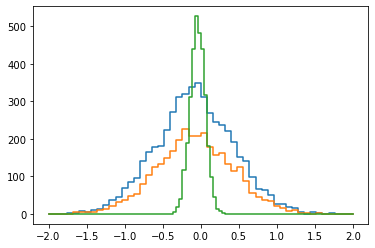

In [19]:
# matplotlib does not support plotting of histograms very well yet

for h in (h_px, h_mc_px, h_delta_px):
    w, xe = h.to_numpy()
    plt.step(xe, np.append(w, 0));

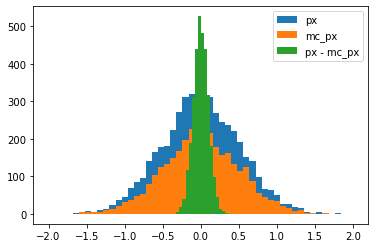

In [20]:
# !pip install pyik
from pyik.mplext import plot_hist

labels = ("px", "mc_px", "px - mc_px")
for i, h in enumerate((h_px, h_mc_px, h_delta_px)):
    w, xe = h.to_numpy()
    plot_hist(xe, w, facecolor=f"C{i}", label=labels[i])

plt.legend()

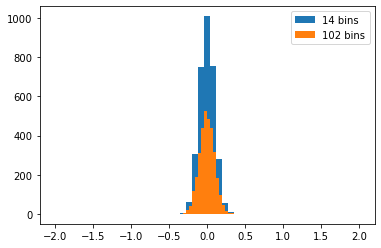

In [21]:
# make a histogram coarser with `rebin` and shrink the range `loc`, 
# using an extended slicing syntax
from boost_histogram.tag import loc, rebin

h_delta_px_2 = h_delta_px[loc(-0.5):loc(0.5):rebin(2)]

for i, h in enumerate((h_delta_px_2, h_delta_px)):
    w, xe = h.to_numpy()
    plot_hist(xe, w, facecolor=f"C{i}", label=f"{h.size} bins")
plt.legend();

In [22]:
# you can make very powerful multi-dimensional histograms with boost-histogram 
# and even so-called profiles

px_axis = bh.axis.Regular(50, -2, 2)
pid_axis = bh.axis.IntCategory([], growth=True)
h_3d = bh.Histogram(px_axis, px_axis, pid_axis)

# compute mean of px in bins of mc_px
p_2d = bh.Histogram(px_axis, pid_axis, storage=bh.storage.Mean())

for data in event.iterate(["trk_px", "trk_imc", "mc_trk_px", "mc_trk_pid"]):
    trk_px, trk_imc, mc_trk_px, mc_trk_pid = data.values()

    for px, imc, mc_px, mc_pid in zip(trk_px, trk_imc, mc_trk_px, mc_trk_pid):
        # select only tracks with associated true particle
        mask = imc >= 0
        px = px[mask]
        associated = imc[mask]
        mc_px = mc_px[associated]
        mc_pid = mc_pid[associated]
        h_3d.fill(mc_px, px, mc_pid)
        p_2d.fill(mc_px, mc_pid, sample=px)

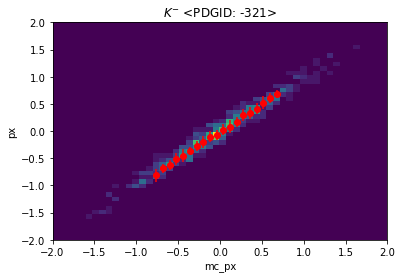

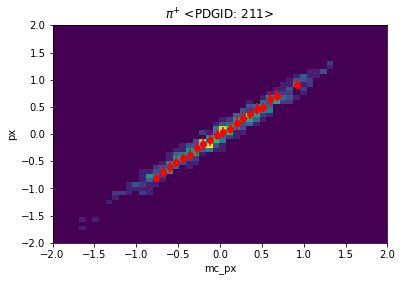

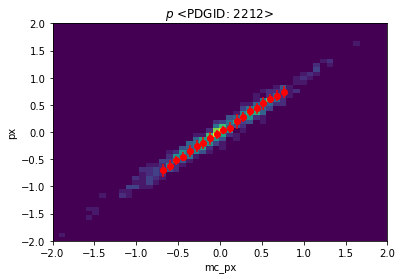

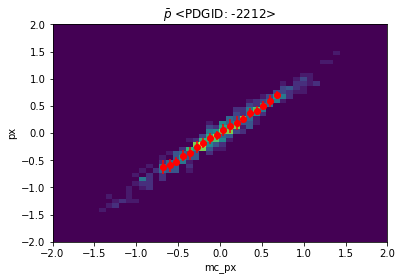

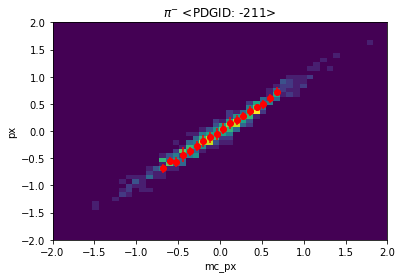

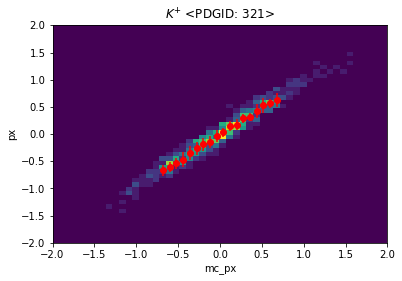

In [23]:
# !pip install particle
import particle

w, xe, ye, ze = h_3d.to_numpy()

w2 = p_2d.view() # get profile content as a numpy array
cx = p_2d.axes[0].centers

# IntCategory axis is special, so handling is a bit different
pids = h_3d.axes[2]
particles = [particle.Particle.from_pdgid(pid) for pid in pids]

for i, particle in enumerate(particles):
    plt.figure()
    plt.pcolormesh(xe, ye, w[..., i])
    # select profile bins with sufficient entries
    w2i = w2[:, i]
    mask = w2i.count > 10
    plt.errorbar(cx[mask], w2i[mask].value, w2i[mask].variance ** 0.5, fmt="or")
    plt.xlabel("mc_px")
    plt.ylabel("px")
    plt.title(f"${particle.latex_name}$ {particle.pdgid}")

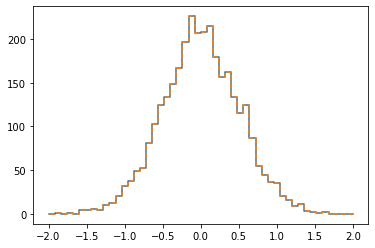

In [24]:
# high-dimensional histograms can be projected loss-lessly to lower-dimensional histograms

h = h_3d.project(0)

for i, h in enumerate((h_mc_px, h)):
    w, xe = h.to_numpy()
    plot_hist(xe, w, ls=("-", "--")[i])

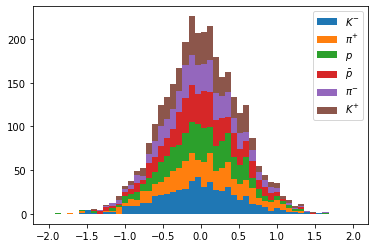

In [33]:
# let's make a stacked histogram to show the components from the individual pids

h_mc_px_3 = h_3d.project(0, 2)

w, xe, ye = h_mc_px_3.to_numpy()
wstack = 0
for i, particle in enumerate(particles):
    wstack += w[:, i]
    plot_hist(xe, wstack, facecolor=f"C{i}",
              label=f"${particle.latex_name}$", zorder=-i)

plt.legend();

**Fits**

* Typical analysis work flow (often automated with Snakemake)
    1. Pre-select data and make compact data trees
    2. Make histograms and profiles from tree data
    3. Fit histograms and profiles to extract physical parameters
* Many specialized fitting tools for individual purposes, e.g.:
    - [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit)
    - [RooFit](https://root.cern.ch/roofit)
* Generic method
    - Select mathematical model (pdf) which describes data
    - Use maximum-likelihood method to adapt model to data
* Specialized methods give fast results for some types of problems
* Generic method allows one to do advanced things not implemented in specialized methods

In [26]:
# !pip install iminuit
from iminuit import Minuit

Let's fit the px distribution with a normal distribution to extract the parameters $\mu$ and $\sigma$.

- To apply maximum-likelihood method, we need a statistical model that describes the data
- Assumption 1: original data before histogramming is normal distributed; pdf is $\mathcal{N}(\mu, \sigma)$ with parameters $\mu$ and $\sigma$
- Assumption 2: count in histogram cell is Poisson distributed $P(n_i, \lambda_i)$
- Expected content in a histogram cell is $\lambda_i = N \int_{x_i}^{x_{i+1}} \mathcal{N}(\mu, \sigma) \, \text{d}x$, where $N$ is total number of events
- Likelihood is joint probability of data under model
  $L = \prod_i P(n_i, \lambda_i)$, need to maximize this by varying model parameters $\mu$ and $\sigma$
- Technical step to achieve this: Minimize cost $S(\mu,\sigma) = -2\ln L(\mu, \sigma) = -2\sum_i \ln P(n_i; \lambda_i)$

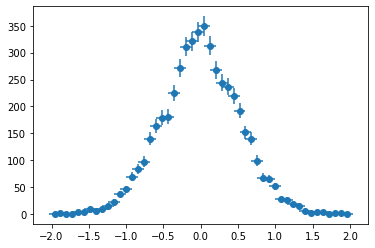

In [27]:
# scipy has efficient and correct implementations for most statistical distributions
from scipy.stats import norm, poisson

# get data from before
px_axis = h_px.axes[0]
cx = px_axis.centers
dx = px_axis.widths
xe = px_axis.edges
n = h_px.view()

plt.errorbar(cx, n, n ** 0.5, dx, fmt="o", label="data");

In [28]:
n_total = np.sum(n)

def cost(mu, sigma):
    cdf = norm(mu, sigma).cdf
    lambdas = n_total * (cdf(xe[1:]) - cdf(xe[:-1]))
    probs = poisson.pmf(n, lambdas)
    return -2 * np.sum(np.log(probs + 1e-100)) # avoid taking log of zero

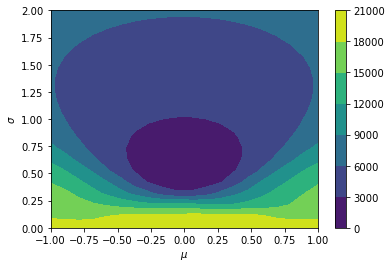

In [32]:
mus = np.linspace(-1, 1, 20)
sigmas = np.linspace(1e-10, 2, 20)

g_mu, g_sigma = np.meshgrid(mus, sigmas)
g_cost = np.vectorize(cost)(g_mu, g_sigma)

plt.contourf(g_mu, g_sigma, g_cost)
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.colorbar();

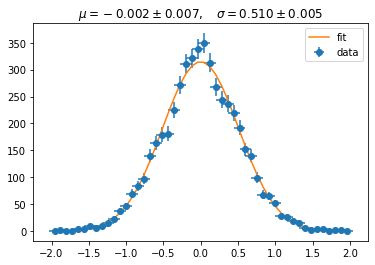

In [30]:
m = Minuit(cost, mu=0, sigma=1, limit_sigma=(0, None), pedantic=False)
m.migrad()

mu, sigma = m.values.values()
s_mu, s_sigma = m.errors.values()

plt.errorbar(cx, n, n ** 0.5, dx, fmt="o", label="data");
plt.plot(cx, norm(mu, sigma).pdf(cx) * n_total * dx, label="fit")
plt.title(f"$\mu = {mu:.3f} \pm {s_mu:.3f}, \quad \sigma = {sigma:.3f} \pm {s_sigma:.3f}$")
plt.legend();

Check whether the fit is good:
- by looking at *pull distribution*
    - $(n_i - \lambda_i) / \lambda_i$ for Poisson distribute data
- by checking the $\chi^2$ value against the degrees of freedom
    - Simple check: $\chi^2/n_\text{dof}$ should be about 1
    - Better check: chance probability $\int_{\chi^2_\text{observed}}^{-\infty} P(\chi^2; n_\text{dof}) \, \text{d}\chi^2$ to obtain a higher value than the observed should not be too small


chi2/ndof = 49.42212072907471 / 48 = 1.0296275151890566
0.41617911801176244


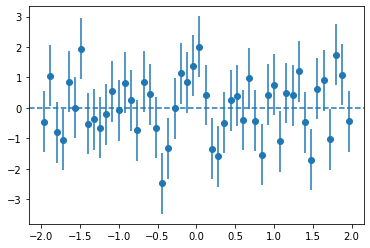

In [31]:
cdf = norm(mu, sigma).cdf

n_pred = (cdf(xe[1:]) - cdf(xe[:-1])) * n_total
n_sigma = n_pred ** 0.5 # for Poisson-distributed data

pull = (n - n_pred) / n_sigma

plt.errorbar(cx, pull, np.ones_like(pull), fmt="o")
plt.axhline(0, ls="--")

# degrees of freedom: number of fitted bins minus number of fitted parameters
n_dof = len(n) - 2 # need to subtract two fitted parameters

chi2_obs = np.sum(pull ** 2)

print(f"chi2/ndof = {chi2_obs} / {n_dof} = {chi2_obs / n_dof}")

from scipy.stats import chi2

chance_prob = 1 - chi2(n_dof).cdf(chi2_obs)

print(f"{chance_prob}") # should not be too small